# **Task 1**

## **Simple Web Scraping and collect customer feedback by analysing third-party data**
In this Colab includes come code to get started scraping data from website. We will use package called BeautifulSoup to collect data from the web. Once, we collected data and save it into local .csv to start analysis.


### **Scraping data and Analysis data from website Skytrax**
Website https://www.airlinequality.com you can see a lot of data there.

In [1]:
#import library
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import shutil

In [2]:
# URL of the website to scrape
url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 37
page_size = 100

review = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{url}page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse the HTML code using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    content = soup.find_all("div", class_="text_content")
    # Extract the review content
    for item in content:
        review.append(item.get_text())

    print(f"   ---> {len(review)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame(review, columns=["Reviews"])
df.head()

,Reviews
0,Not Verified | The WORST customer experience! ...
1,Not Verified | Had to cancel my flight month...
2,✅ Trip Verified | Flight cancelled with no rea...
3,✅ Trip Verified | This is a route I fly regula...
4,✅ Trip Verified | While BA may have made some...


In [4]:
# clean dataset and remove unused text
df['Reviews'] = df['Reviews'].str.replace('✅ Trip Verified ', '')
df['Reviews'] = df['Reviews'].str.replace('Not Verified', '')
df['Reviews'] = df['Reviews'].str.replace('not verified', '')
df['Reviews'] = df['Reviews'].str.replace('|', '')
df['Reviews'] = df['Reviews'].str.replace('✅ Verified Review', '')
df['Reviews'] = df['Reviews'].str.replace('❎ Unverified', '')
df['Reviews'] = df['Reviews'].str.strip()
df.head()

,Reviews
0,The WORST customer experience! British Airways...
1,Had to cancel my flight months in advance due ...
2,Flight cancelled with no reason given less tha...
3,This is a route I fly regularly. Used first cl...
4,While BA may have made some positive improveme...


In [5]:
df.shape

(3700, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  3700 non-null   object
dtypes: object(1)
memory usage: 29.0+ KB


In [7]:
# save clean dataset to csv file
df.to_csv("BA_airline_reviews.csv")

### Find Key Topic and Sentiment Analysis

In [8]:
# import library
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter

In [9]:
# read the review from a csv file
sentiment_analyzer = pd.read_csv("/content/BA_airline_reviews.csv")
sentiment_analyzer.head()

,Unnamed: 0,Reviews
0,0,The WORST customer experience! British Airways...
1,1,Had to cancel my flight months in advance due ...
2,2,Flight cancelled with no reason given less tha...
3,3,This is a route I fly regularly. Used first cl...
4,4,While BA may have made some positive improveme...


In [10]:
# drop unused colum
sentiment_analyzer = sentiment_analyzer.drop(columns=['Unnamed: 0'])
sentiment_analyzer.head()

,Reviews
0,The WORST customer experience! British Airways...
1,Had to cancel my flight months in advance due ...
2,Flight cancelled with no reason given less tha...
3,This is a route I fly regularly. Used first cl...
4,While BA may have made some positive improveme...


In [11]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# an instance of sentimentIntensityAnalyzer
sid = vader.SentimentIntensityAnalyzer()

# create new column named "Sentiment"
sentiment_analyzer['Sentiment'] = sentiment_analyzer['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
sentiment_analyzer.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Reviews,Sentiment
0,The WORST customer experience! British Airways...,-0.9386
1,Had to cancel my flight months in advance due ...,-0.6369
2,Flight cancelled with no reason given less tha...,-0.9612
3,This is a route I fly regularly. Used first cl...,0.9471
4,While BA may have made some positive improveme...,0.5332


In [14]:
# create another column for statement "Positif" and "Negatif"
sentiment_analyzer['Sentiment Type'] = sentiment_analyzer['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
sentiment_analyzer

,Reviews,Sentiment,Sentiment Type
0,The WORST customer experience! British Airways...,-0.9386,negative
1,Had to cancel my flight months in advance due ...,-0.6369,negative
2,Flight cancelled with no reason given less tha...,-0.9612,negative
3,This is a route I fly regularly. Used first cl...,0.9471,positive
4,While BA may have made some positive improveme...,0.5332,positive
...,...,...,...
3695,Flight left on time and arrived over half an h...,-0.9531,negative
3696,"Very Poor Business class product, BA is not ev...",-0.7082,negative
3697,This review is for LHR-SYD-LHR. BA015 and BA01...,0.9044,positive
3698,Absolutely pathetic business class product. BA...,0.9746,positive


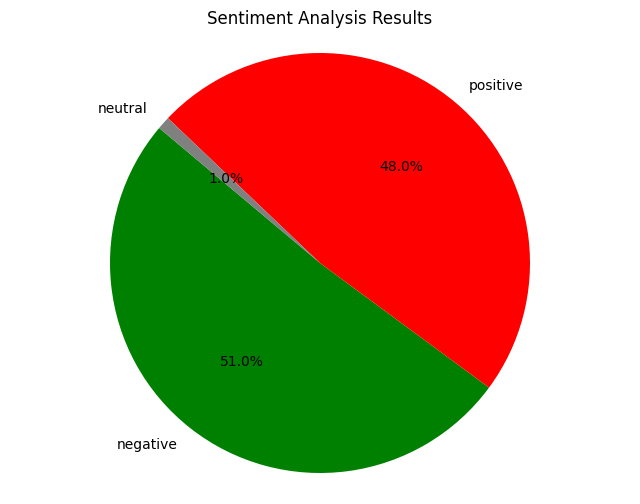

In [13]:
# calculate the persentage of each type of sentiment score
sentiment_presentage = sentiment_analyzer['Sentiment Type'].value_counts(normalize=True) * 100

# create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_presentage, labels=sentiment_presentage.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'grey'])
plt.title('Sentiment Analysis Results')
plt.axis('equal')
plt.show()

From the pie chart above, positive sentiment gets 48.0%, negative 51.0%, and neutral 1.0%

In [17]:
sentiment_analyzer["Sentiment Type"].value_counts()

Sentiment Type
negative    1887
positive    1776
neutral       37
Name: count, dtype: int64

A total of 3700 reviews were taken, 1887 were negative, 1776 were positive, and 37 were neutral. This means most reviews are polarized into positive or negative


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


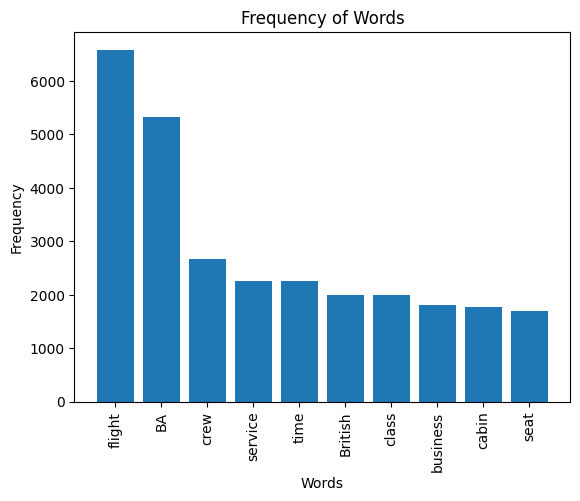

In [22]:
# the frequency chart show the ky topics within the reviews showing what people are actively talking about their experience and staff

# download stopword
nltk.download('stopwords')

# get the review from dataset
sentiment_chart = sentiment_analyzer['Reviews']

#convert the reviews to a list of word
words = []
for review in sentiment_chart:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-', 'We']]

# Count the frequency of each word
word_counts = Counter(key_words)
top_words = word_counts.most_common(10)

# Filter out the stop words
filtered_words = [
    (word, count) for word, count in top_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# get the labels and values for histogram
Labels, Values = zip(*filtered_words)

# create the histogram
plt.bar(Labels, Values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Words')
plt.xticks(rotation=90)
plt.show()

The frequency graph below shows that the main topics in reviews include **“flight”**, **“BA”**, **“crew”**, and **“service”**, indicating that people are actively talking about their experience and staff.

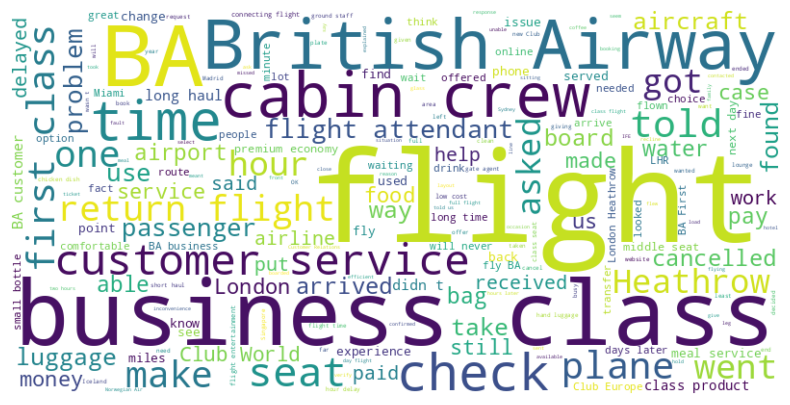

In [18]:
# the frequency chart show the key topics with wordcloud
from wordcloud import WordCloud

# create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(sentiment_analyzer['Reviews']))

# display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud also showed similar words and key topics within the reviews. This includes “flight”, “BA”, "British Airway", “business class” and “time”, showing that people are actively talking about their experience and staff